# Importar librerias de websracpping

In [87]:
def extraer_info(url):
    options = Options()
    options.add_argument("--headless")  # Ejecutar en modo headless para que no se aprecie la ventana
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")

    service = Service()  # Crear el servicio para el controlador
    driver = webdriver.Chrome(service=service, options=options)  # Iniciar el navegador con opciones
    driver.get(url)
    time.sleep(5)  # Espera a que cargue la página y JS

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()

    titles = []
    descriptions = []
    image_urls = []
    gif_urls = []

    # Extraer todos los títulos y subtítulos (h1 a h6)
    for heading in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
        titles.append(heading.get_text(strip=True))

    # Extraer descripciones desde etiquetas <p> o <div>
    for paragraph in soup.find_all('p'):
        text = paragraph.get_text(strip=True)
        if len(text) > 30:  # Filtrar textos cortos
            descriptions.append(text)

    # Extraer imágenes y GIFs
    blacklist_keywords = [
        'logo', 'loggo', 'logotipo', 'favicon', 'icon', 'ico', 'brandmark',
        'marca', 'log_', '_logo', 'log-', '-logo', 'logggo', 'watermark',
        'paypal', 'sistecredito', 'visa', 'mastercard', 'payment', 'pago',
        'credit', 'debit', 'secure', 'checkout', 'cart'
    ]

    for img in soup.find_all('img'):
        src = img.get('src') or img.get('data-src') or img.get('data-image')
        if src:
            full_url = urljoin(url, src)
            full_url_lower = full_url.lower()

            # Excluir imágenes irrelevantes
            if any(keyword in full_url_lower for keyword in blacklist_keywords):
                continue

            # Clasificar imágenes como GIFs o imágenes normales
            if "gif" in full_url_lower:
                gif_urls.append(full_url)
            else:
                image_urls.append(full_url)

    # Eliminar duplicados
    image_urls = list(set(image_urls))
    gif_urls = list(set(gif_urls))

    # Filtrar imágenes por tamaño (opcional, requiere requests y Pillow)
    filtered_image_urls = []
    for img_url in image_urls:
        try:
            response = requests.get(img_url, stream=True, timeout=5)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                width, height = img.size
                # Excluir imágenes pequeñas (por ejemplo, iconos)
                if width > 100 and height > 100:  # Ajusta el tamaño mínimo según sea necesario
                    filtered_image_urls.append(img_url)
        except Exception:
            continue

    # Agregar todos los títulos como un valor adicional
    todos_los_titulos = titles

    print("Títulos de productos:", titles)
    print("Descripciones de productos:", descriptions)
    print("URLs de imágenes filtradas:", filtered_image_urls)
    print("URLs de GIFs:", gif_urls)

    # Devolver 5 valores
    return titles, descriptions, todos_los_titulos, filtered_image_urls, gif_urls





In [149]:
import time
import requests
from io import BytesIO
from PIL import Image
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from dotenv import load_dotenv
import requests
from dotenv import load_dotenv
import os
import openai
import re

load_dotenv()
api_key = os.getenv("DEEPSEEK_API_KEY")







Títulos de productos: ['Item added to your cart', 'CUIDARTE NO ES UN LUJO,ES UN ACTO DE AMOR PROPIO💖', 'PARCHES DE HIDROGEL CON EXTRACTO HIDROLIZADO DE DURAZNO 🍑⭐', 'PARCHES DE HIDROGEL CON EXTRACTO HIDROLIZADO DE DURAZNO 🍑⭐', '👋🏼DILE ADIÓS A LAS OJERAS, LAS BOLSAS Y LA MIRADA CANSADA 🤩', '🍑UNA RUTINA DE MINUTOS QUE TRANSFORMA TU MIRADA 💖', '⚠️ ¡ATENCIÓN! ⚠️', '👁️ IMAGINÁ TU MIRADA LUMINOSA, FRESCA Y DESPIERTA CADA MAÑANA 💖', 'HAZ TU PEDIDO HOY CON DESCUENTO, Y DEVUELVE LUZ A TU MIRADA ✨', '1 unidad (60 parches)  $49.900 😯', '2 unidades (120 parches)  $69.900🔥', '3 unidades (180 parches)  $89.900🤩', 'TODOS INCLUYEN ENVÍO GRATIS Y PAGO CONTRA ENTREGA🚚', 'Reseñas de Clientes', '¡SÉ LA PRIMERA EN ENTERARTE DE NUESTRAS SORPRESAS! ✨']
Descripciones de productos: ['ENVÍO GRATIS + PAGO CONTRAENTREGA', '+1350 han comprado este producto✅', '🚚 Entregas entre 3 a 5 días hábiles a todo Colombia.', '¿Te mirás al espejo y lo primero que ves son tus ojos hinchados, con ojeras oscuras y esa expresión 

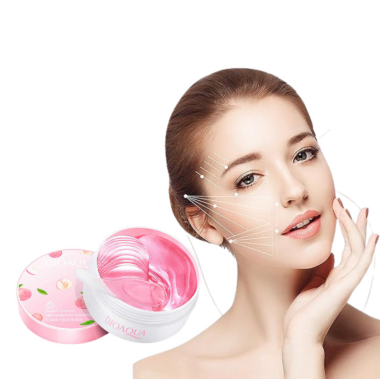

URL: https://dyshopcol.com/cdn/shop/files/Anadir_un_subtitulo_1.webp?v=1743701171&width=1445


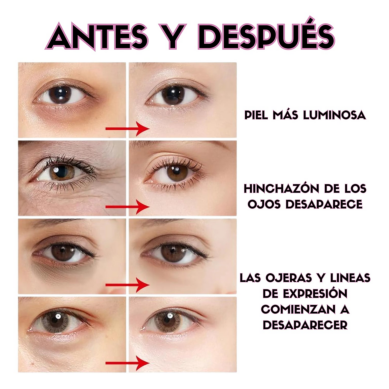

URL: https://dyshopcol.com/cdn/shop/files/S292e82442e0d4e4686e61b33fc64b19aZ.jpeg_960.webp?v=1743699322&width=1946


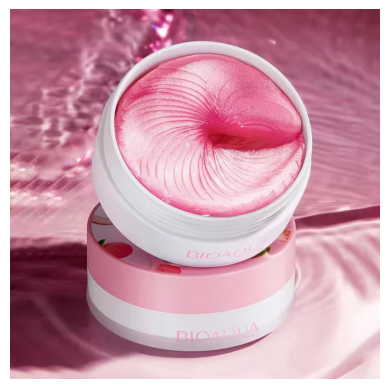

URL: https://judgeme.imgix.net/dyshop/1743735544__254cc32bea812ae361ae969d3306a0a083c4ff7b__original.jpeg?auto=format&w=160


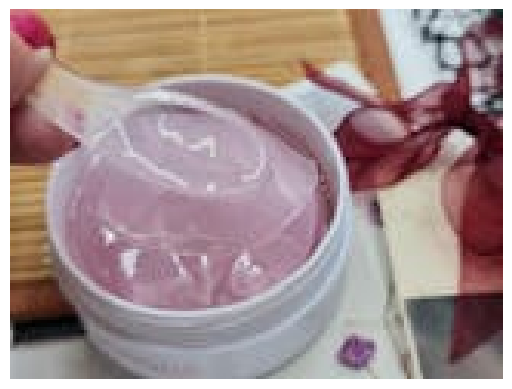

URL: https://dyshopcol.com/cdn/shop/files/2.webp?v=1743699322&width=1946


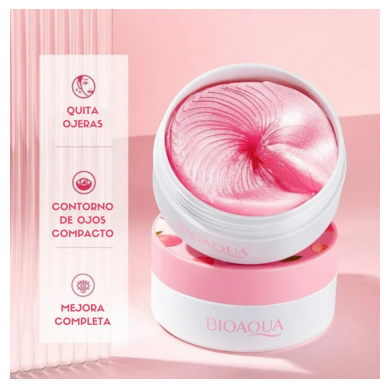

URL: https://dyshopcol.com/cdn/shop/files/2.webp?v=1743699322&width=1445


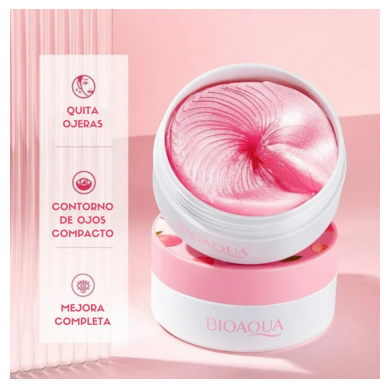

URL: https://dyshopcol.com/cdn/shop/files/1_1.webp?v=1743812118&width=1946


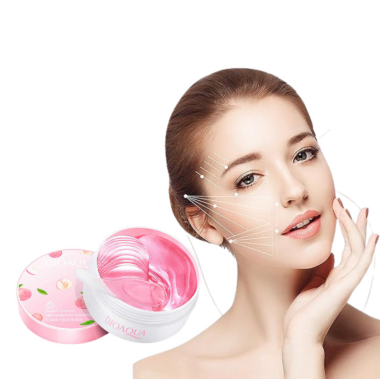

URL: https://judgeme.imgix.net/dyshop/1743735456__capturadepantalla2025-04-03215553__original.png?auto=format&w=160


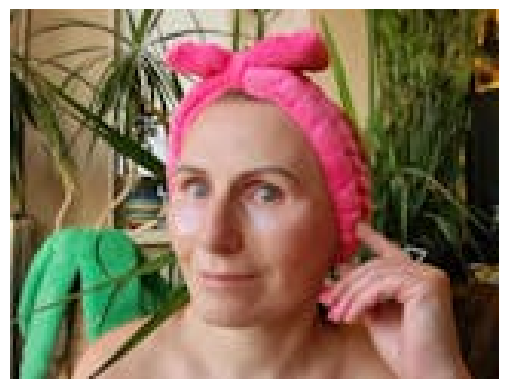

URL: https://dyshopcol.com/cdn/shop/files/7_11zon_1.webp?v=1743716276&width=1500


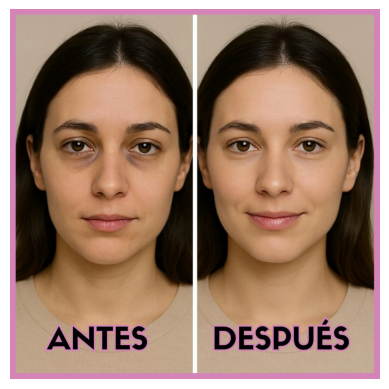

URL: https://judgeme.imgix.net/dyshop/1743735015__523586a13f7f6c3cefd25ff930b22c6dc38e18c0__original.jpeg?auto=format&w=160


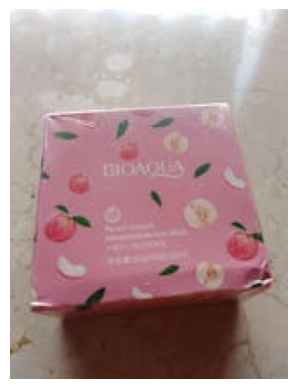

URL: https://dyshopcol.com/cdn/shop/files/472648485_18264_11zon.webp?v=1743711590&width=1500


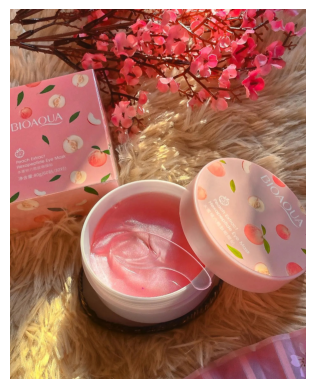

URL: https://dyshopcol.com/cdn/shop/files/Anadir_un_subtitulo_1.webp?v=1743701171&width=1946


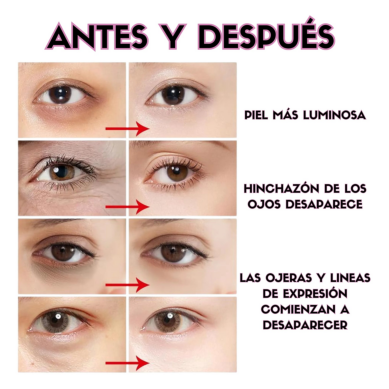

URL: https://judgeme.imgix.net/dyshop/1743735910__935992046c94dc494d33346b40b6281a7df5147e__original.jpeg?auto=format&w=160


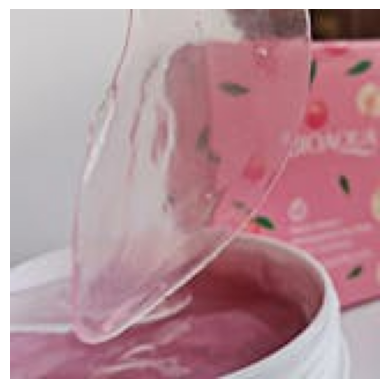

URL: https://dyshopcol.com/cdn/shop/files/S292e82442e0d4e4686e61b33fc64b19aZ.jpeg_960.webp?v=1743699322&width=1445


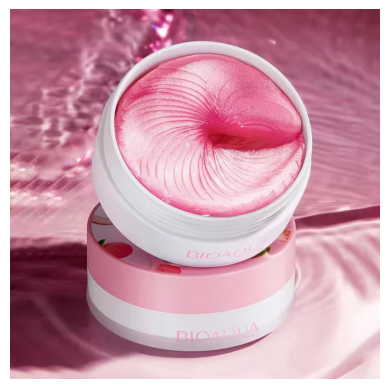

URL: https://dyshopcol.com/cdn/shop/files/Anadirunsubtitulo.webp?v=1743812118&width=1500


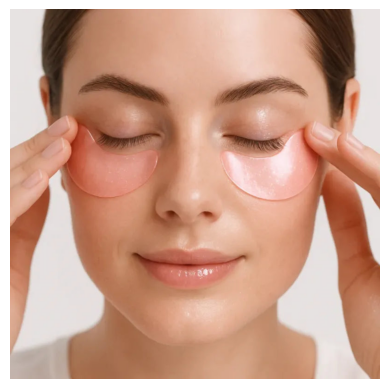

URL: https://judgeme.imgix.net/dyshop/1743735659__f17352a2ab6b361a7c061f57ef48d74eb5014da5__original.jpeg?auto=format&w=160


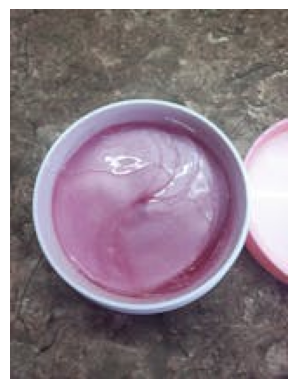

URL: https://judgeme.imgix.net/dyshop/1743735658__cebda50d5c5a91ea3728b84742d85c76132d1f13__original.jpeg?auto=format&w=160


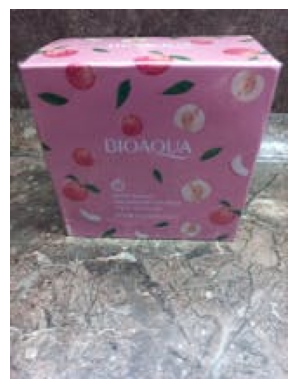

In [ ]:
url = "https://dyshopcol.com/products/parches-de-ojos-durazno-bioaqua"
titulo, descripcion, todos_los_titulos, imagenes, gifs = extraer_info(url)


# Mostrar imágenes y URLs
for img_url in imagenes:
    print("URL:", img_url)
    response = requests.get(img_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print(f"Error al cargar la imagen desde {img_url}")

## Agente ia para generar guiones y angulos de ventas


In [153]:
class DeepSeekAdAgent:
    def __init__(self):
        load_dotenv()
        self.api_key = os.getenv("DEEPSEEK_API_KEY")
        if not self.api_key:
            raise ValueError("❌ No se encontró la API Key de DeepSeek en el archivo .env")

    def generate_with_deepseek(self, prompt):
        print("🧠 Generando contenido con DeepSeek...")

        url = "https://api.deepseek.com/chat/completions"
        headers = {
            "Content-Type": "application/json",
            "Authorization": f"Bearer {self.api_key}"
        }

        user_prompt = f"""Crea contenido publicitario para este producto:

Título del producto: {prompt['titulo']}
Descripción del producto: {prompt['descripcion']}
Cantidad de imágenes: {prompt['num_imagenes']}
Cantidad de GIFs: {prompt['num_gifs']}

Devuélveme la respuesta en este formato exacto:

=== 📢 Títulos Publicitarios ===
- Título 1
- Título 2

=== ✍️ Copies ===
- Copy 1
- Copy 2

=== 🎬 Guión para Reel ===
[Texto del guión dividido por segundos]

FIN DEL PROMPT
"""

        messages = [
            {"role": "system", "content": "Eres un redactor creativo experto en publicidad para redes sociales."},
            {"role": "user", "content": user_prompt}
        ]

        data = {
            "model": "deepseek-chat",
            "messages": messages,
            "temperature": 0.7
        }

        response = requests.post(url, json=data, headers=headers)

        print("🪵 Respuesta completa de DeepSeek:")
        print(response.text)

        if response.status_code != 200:
            raise Exception(f"❌ Error al llamar la API de DeepSeek: {response.text}")

        result = response.json()["choices"][0]["message"]["content"]

        return self._parse_response(result)

    def _parse_response(self, response_text):
        print("🧩 Texto recibido para parsear:\n", response_text)

        titulos = []
        copies = []
        guion = ""

        # Buscar títulos
        titulos_match = re.search(r"=== 📢 T[ií]tulos Publicitarios ===\n(.*?)(?=\n===|\Z)", response_text, re.DOTALL)
        if titulos_match:
            titulos = [line.strip("-• ") for line in titulos_match.group(1).strip().split("\n") if line.strip()]
        else:
            print("⚠️ No se encontraron títulos.")

        # Buscar copies
        copies_match = re.search(r"=== ✍️ Copies ===\n(.*?)(?=\n===|\Z)", response_text, re.DOTALL)
        if copies_match:
            copies = [line.strip("-• ") for line in copies_match.group(1).strip().split("\n") if line.strip()]
        else:
            print("⚠️ No se encontraron copies.")

        # Buscar guión
        guion_match = re.search(r"=== 🎬 Gu[ií]on.*?===\n*(.*?)(?:\nFIN DEL PROMPT|\Z)", response_text, re.DOTALL)
        if guion_match:
            guion = guion_match.group(1).strip()
        else:
            print("⚠️ No se encontró el guión.")

        return {
            "titulos": titulos,
            "copies": copies,
            "guion_video": guion
        }

    def generate_ad_content(self, product_data):
        descripcion_resumida = next((d for d in product_data["descripcions"] if len(d) > 40), "Sin descripción")

        prompt = {
            "titulo": product_data["titulo"],
            "descripcion": descripcion_resumida,
            "num_imagenes": len(product_data["imagenes"]),
            "num_gifs": len(product_data["gifs"])
        }

        return self.generate_with_deepseek(prompt)



In [157]:

url_producto = "https://zonagamer.co/products/silla-de-oficina-titan-black-2-0-1523f-1"

# Extraer datos del producto desde la web
titulo, descripcions, todos_los_titulos, imagenes, gifs = extraer_info(url_producto)

# Preparar los datos para el agente
datos_producto = {
    "titulo": titulo[0] if titulo else "Sin título",
    "descripcions": descripcions if descripcions else ["Sin descripción"],
    "todos_los_titulos": todos_los_titulos,
    "imagenes": imagenes,
    "gifs": gifs
}

# Crear el agente y generar contenido
agente = DeepSeekAdAgent()
contenido = agente.generate_ad_content(datos_producto)






Títulos de productos: ['Silla Gerencial Titan Black 2.0 1523F', 'Silla de Oficina Titan Black 2.0 1523F: Comodidad y resistencia en una sola pieza', 'Maximiza tu productividad con la Silla de Oficina Titan Black 2.0 1523F', 'Exclusividad y facilidad de compra en Zona Gamer', 'Otros productos que podrían interesarte.', '']
Descripciones de productos: ['La Silla de Oficina Titan Black 2.0 1523F es el modelo perfecto para aquellos que buscan confort y durabilidad. Cuenta con un acabado en textura de fibra de carbono, uno de los materiales más resistentes en el mercado. Además, su diseño en color negro se adapta a cualquier entorno laboral, brindándole un toque de profesionalismo a tu oficina.', 'Esta silla, capaz de soportar hasta 120 kg, es perfecta para largas jornadas de trabajo gracias a su capacidad de reclinación de hasta 125 grados. Sus ruedas de nylon brindan un fácil desplazamiento, permitiendo que te muevas con facilidad en tu espacio de trabajo.', 'La Silla de Oficina Titan Bla